In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [21]:
df.shape

(13320, 9)

In [22]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [24]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [25]:
df = df.drop(['area_type','location','availability','society'],axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [27]:
df['price'].describe()

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64

In [28]:
df.shape

(13320, 5)

<Axes: xlabel='price', ylabel='Density'>

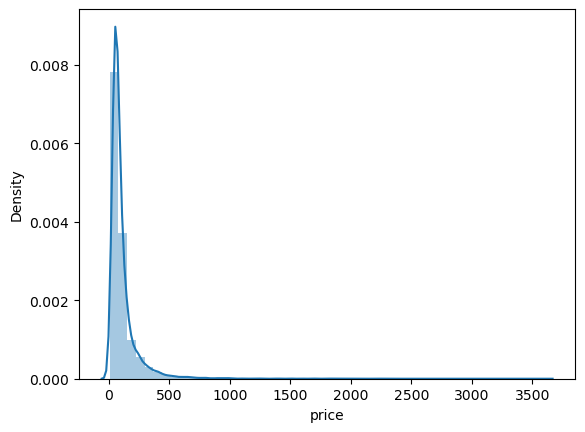

In [29]:
sns.distplot(df['price'])


<Axes: >

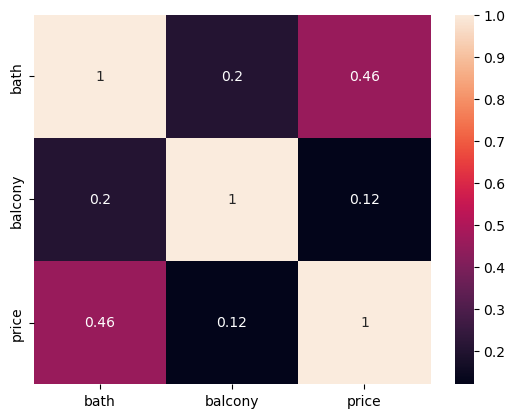

In [30]:
numericalColumns = ["bath","balcony","price"]
corr = df[numericalColumns].corr()
sns.heatmap(corr, annot=True)

In [31]:
df.isnull().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [32]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df['size'].isnull().sum()

16

In [34]:
def changesize(val):
    if val == np.nan:
        return np.nan
    else:
        val = str(val).split(' ')
        val = val[0]
        return float(val)
    
df['size'] = df['size'].apply(changesize)

df['size'] = df['size'].fillna(df['size'].mean())


df['size'].isnull().sum()

0

In [35]:
df.isnull().sum()

size            0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [36]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

In [37]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [38]:
df.isnull().sum()

size            0
total_sqft      0
bath            0
balcony       609
price           0
dtype: int64

In [39]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [40]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [41]:
df.isnull().sum()

size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13320 non-null  float64
 1   total_sqft  13320 non-null  object 
 2   bath        13320 non-null  float64
 3   balcony     13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(4), object(1)
memory usage: 520.4+ KB


In [43]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [44]:
total_sqft_int = []

for val in df['total_sqft']:
    try:
        total_sqft_int.append(float(val))
    except:
        try:
            val = val.split('-')
            total_sqft_int.append((float(val[0]) + float(val[1])) / 2)  
        except:
            total_sqft_int.append(np.nan)  

In [45]:
df = df.join(pd.DataFrame({'new_total_sqft':total_sqft_int}))

In [46]:
df['new_total_sqft'] = df['new_total_sqft'].fillna(df['new_total_sqft'].mean())

In [47]:

df = df.drop(['total_sqft'],axis = 1)

In [48]:
df.sample(5)

,size,bath,balcony,price,new_total_sqft
4392,3.0,3.0,2.0,70.00,1460.0
10185,3.0,3.0,3.0,55.00,1575.0
1911,2.0,2.0,0.0,42.00,680.0
9460,2.0,2.0,1.0,46.33,1130.0
3870,4.0,4.0,0.0,330.00,3000.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   size            13320 non-null  float64
 1   bath            13320 non-null  float64
 2   balcony         13320 non-null  float64
 3   price           13320 non-null  float64
 4   new_total_sqft  13320 non-null  float64
dtypes: float64(5)
memory usage: 520.4 KB


In [50]:
df.isnull().sum()

size              0
bath              0
balcony           0
price             0
new_total_sqft    0
dtype: int64